In [1]:
import dask
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import *
import seaborn
import re
import gensim
from gensim.models.word2vec import Word2Vec, LineSentence
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import timeit
import warnings
import zipfile
import os
import sys
import copy
warnings.filterwarnings('ignore')

In [2]:
# load the corpus for word2vec
user = input("Who is using the notebook? ")
if user == "Tim":
    corpus_name = "/Users/timqzhang/Desktop/UChicago/MACSS_Spring_2020/content_local/rmrb/7z"
elif user == "Linghui":
    corpus_name = "/Users/linghuiwu/uchicago/courseworks/soci40133/rmrb/7z"
elif user == "Minghao":
    corpus_name = "C:/Users/Thinkpad/ContentAnalysis/EconContent/data/corpus_by_year/"
elif user == "Minghao_RCC":
    corpus_name = "/home/mhyang/EconContent/data/corpus_by_year/"

Who is using the notebook? Minghao


### Word2Vec with full sample

In [3]:
# a first time indicator 
# please enter "No" because the word2vec model with full sample has been uploaded to git repo
first_time = input("Is this the first time to train the word2vec model with full sample? ")

Is this the first time to train the word2vec model with full sample? No


In [4]:
%%time
if first_time == "Yes":
#     corpus_full = []
#     for year in range(1965, 2003):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus_full.append(tokens)
#     model_full = Word2Vec(corpus_full, size=200, window=10, min_count=5, workers=8, seed=0)
#     model_full.save('../data/rmrb_full_W2V')
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_full = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_full_W2V')
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 2.77 s


In [5]:
# most similar words to "经济"
model_full.most_similar("经济", topn=30)

[('国民经济', 0.7047548890113831),
 ('经济社会', 0.6835517287254333),
 ('在经济上', 0.584583044052124),
 ('城乡经济', 0.5507814884185791),
 ('工业生产', 0.5420782566070557),
 ('商品流通', 0.5362972021102905),
 ('对外贸易', 0.5362279415130615),
 ('经济繁荣', 0.5219799280166626),
 ('工业', 0.5194350481033325),
 ('宏观经济', 0.5095250606536865),
 ('产业', 0.5007330775260925),
 ('商品生产', 0.49550092220306396),
 ('商品经济', 0.4891799986362457),
 ('政治经济', 0.48831894993782043),
 ('物资流通', 0.4858139753341675),
 ('生产力', 0.48249131441116333),
 ('出口贸易', 0.4787532389163971),
 ('国家', 0.4786701202392578),
 ('经贸', 0.475691556930542),
 ('平衡', 0.47392386198043823),
 ('企业', 0.4730418622493744),
 ('发展', 0.4718932807445526),
 ('稳定', 0.46824193000793457),
 ('赖际', 0.46810856461524963),
 ('沿海经济', 0.4664963185787201),
 ('集体经济', 0.4660484790802002),
 ('生产', 0.46557676792144775),
 ('旅游业', 0.4646378755569458),
 ('加工工业', 0.464486300945282),
 ('国际贸易', 0.4625011384487152)]

In [6]:
# most similar words to "政治"
model_full.most_similar("政治", topn=30)

[('在政治上', 0.7189272046089172),
 ('政治素质', 0.49460527300834656),
 ('党的建设', 0.4752221703529358),
 ('崇美', 0.4627997875213623),
 ('党建', 0.4455682337284088),
 ('道德修养', 0.44051045179367065),
 ('教育', 0.4352807402610779),
 ('作风纪律', 0.4329605996608734),
 ('社会主义', 0.43256697058677673),
 ('德党', 0.42983633279800415),
 ('政治路线', 0.4284876585006714),
 ('党的领导', 0.42812931537628174),
 ('政治宣传', 0.4278131127357483),
 ('政治性', 0.4265213906764984),
 ('必须', 0.4184496998786926),
 ('专政', 0.4180828332901001),
 ('军事', 0.4180217981338501),
 ('社会', 0.4163997769355774),
 ('道德', 0.41571980714797974),
 ('阶级斗争', 0.413579523563385),
 ('革命性', 0.41300487518310547),
 ('加诺兄', 0.41279923915863037),
 ('上筑牢', 0.4124164283275604),
 ('理论', 0.4100203514099121),
 ('资产阶级', 0.40842607617378235),
 ('民主', 0.4040853679180145),
 ('政治工作者', 0.4038689136505127),
 ('强调', 0.4020741581916809),
 ('意识形态', 0.401529461145401),
 ('巴迪亚', 0.3998579978942871)]

In [7]:
# most similar words to "政治" + "经济"
model_full.most_similar(positive=[u"政治", u"经济"], topn=20)

[('社会', 0.5568037033081055),
 ('社会主义', 0.5322310924530029),
 ('政治经济', 0.5294690132141113),
 ('国民经济', 0.5292337536811829),
 ('巴迪亚', 0.5210733413696289),
 ('经济社会', 0.518622100353241),
 ('必须', 0.5129322409629822),
 ('改革', 0.507105827331543),
 ('西元彻', 0.5062365531921387),
 ('在政治上', 0.4994303584098816),
 ('关系', 0.4970846176147461),
 ('德党', 0.49647772312164307),
 ('文化', 0.4950624108314514),
 ('各项', 0.49228447675704956),
 ('发展', 0.4885441064834595),
 ('政策', 0.4873436689376831),
 ('方面', 0.4856113791465759),
 ('自身', 0.48548656702041626),
 ('船旗国', 0.4851929843425751),
 ('通政', 0.4812116026878357)]

In [9]:
# 公有制 + 资本主义 - 社会主义
model_full.most_similar(positive=[u'公有制', u'资本主义'], negative=[u'社会主义'])

[('墙脚', 0.5380445122718811),
 ('公有', 0.535496711730957),
 ('初级阶段', 0.4975186884403229),
 ('私有制', 0.49537062644958496),
 ('私有化', 0.46867311000823975),
 ('国营经济', 0.4633598327636719),
 ('单干', 0.4611584544181824),
 ('两极分化', 0.4496586322784424),
 ('所有制', 0.44949597120285034),
 ('个体经济', 0.4468238949775696)]

In [10]:
# 公有制 + 资本主义 - 社会主义
model_full.most_similar(positive=[u'计划经济', u'资本主义'], negative=[u'社会主义'])

[('市场经济', 0.5006380677223206),
 ('统购包销', 0.4762028455734253),
 ('小农经济', 0.4687221646308899),
 ('墙脚', 0.4580497741699219),
 ('统得', 0.4492679536342621),
 ('商品经济', 0.44538071751594543),
 ('初级阶段', 0.440067321062088),
 ('短缺经济', 0.42808371782302856),
 ('空想', 0.42348188161849976),
 ('计划体制', 0.41563528776168823)]

### Projection with economics and politics subsample

In [11]:
# a first time indicator 
# please enter "No" because the word2vec model with subsample has been uploaded to git repo
first_time = input("Is this the first time to train the word2vec model with economics and politics sample? ")

Is this the first time to train the word2vec model with economics and politics sample? No


In [12]:
%%time
# train the word2vec model with economics and politics subsample
if first_time == 'Yes':
#     corpus_sub = []
#     for year in range(1965, 2003):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus_sub.append(tokens)
#     model_sub = Word2Vec(corpus_sub, size=200, window=10, min_count=5, workers=8, seed=0)
#     model_sub.save('../models/Word2Vec&Doc2Vec/rmrb_sub_W2V')
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_sub = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_sub_W2V')
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 1.14 s


In [13]:
# Prepare for visualization
VisNumWords = 50
VisTargetWords = model_sub.wv.index2word[:VisNumWords]

VisWordsSubMatrix = []
for word in VisTargetWords:
    VisWordsSubMatrix.append(model_sub[word])
VisWordsSubMatrix = np.array(VisWordsSubMatrix)

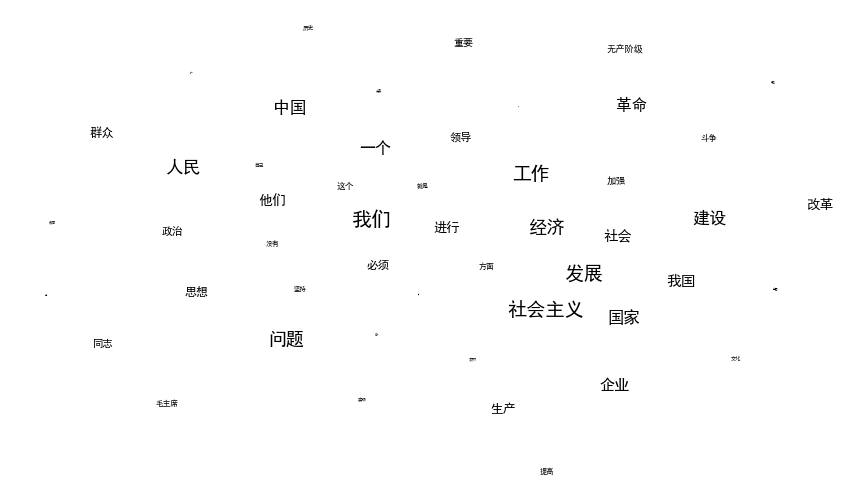

In [14]:
# Visualization with T-SNE 
VisPCAWords = PCA(n_components = 50).fit(VisWordsSubMatrix)
VisReducedPCA = VisPCAWords.transform(VisWordsSubMatrix)
VisTSNEWords = TSNE(n_components = 2).fit_transform(VisReducedPCA)

mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize = (15, 9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(VisTSNEWords[:, 0], VisTSNEWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(VisTargetWords):
    ax.annotate(word, (VisTSNEWords[:, 0][i], VisTSNEWords[:, 1][i]), size =  20 * (VisNumWords - i) / VisNumWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
# most similar words to "计划经济"
model_full.most_similar("计划经济", topn=20)

[('计划体制', 0.6442259550094604),
 ('计划调节', 0.6439828872680664),
 ('市场调节', 0.6180932521820068),
 ('短缺经济', 0.5950658917427063),
 ('转轨', 0.5811647176742554),
 ('高度集中', 0.5631114840507507),
 ('经济体制', 0.5481372475624084),
 ('体制', 0.5398797988891602),
 ('市场机制', 0.5385992527008057),
 ('统得', 0.5231367349624634),
 ('统购包销', 0.5207663774490356),
 ('价值规律', 0.5160901546478271),
 ('市场经济', 0.5151220560073853),
 ('公有制', 0.5126941204071045),
 ('自然经济', 0.5121173858642578),
 ('指令性', 0.5049662590026855),
 ('小农经济', 0.5004916191101074),
 ('僵化', 0.49541807174682617),
 ('双轨制', 0.495257169008255),
 ('商品经济', 0.4913255572319031)]

In [16]:
# most similar words to "市场经济"
model_full.most_similar("市场经济", topn=20)

[('商品经济', 0.8256054520606995),
 ('经济体制', 0.5783637166023254),
 ('商品生产', 0.5539597272872925),
 ('市场机制', 0.5441486239433289),
 ('初级阶段', 0.5326134562492371),
 ('计划经济', 0.5151219367980957),
 ('自我完善', 0.5099714994430542),
 ('义利观', 0.4840741753578186),
 ('市场调节', 0.48258620500564575),
 ('法制', 0.48011767864227295),
 ('市场', 0.4618592858314514),
 ('搞活经济', 0.4542299509048462),
 ('分配原则', 0.4508650302886963),
 ('价值规律', 0.4496119022369385),
 ('商品流通', 0.4416325092315674),
 ('论库', 0.4387979209423065),
 ('法治', 0.43433648347854614),
 ('社会存在', 0.4284587800502777),
 ('公有制', 0.4279572665691376),
 ('经济基础', 0.41887450218200684)]

In [17]:
# most similar words to "社会主义"
model_full.most_similar("社会主义", topn=20)

[('无产阶级', 0.5221437811851501),
 ('马克思主义', 0.5109810829162598),
 ('改革开放', 0.49035167694091797),
 ('正确', 0.48974016308784485),
 ('共产主义', 0.488533079624176),
 ('工人阶级', 0.4855993092060089),
 ('四化', 0.4804920256137848),
 ('物质文明', 0.47921982407569885),
 ('改革', 0.466660737991333),
 ('党的领导', 0.4646495580673218),
 ('我们', 0.46260538697242737),
 ('现阶段', 0.45873311161994934),
 ('人民军队', 0.45346495509147644),
 ('社会', 0.45202627778053284),
 ('共同理想', 0.45101460814476013),
 ('自身', 0.44066959619522095),
 ('斗争', 0.4405137896537781),
 ('人民', 0.4397428333759308),
 ('嘉久雄', 0.43970659375190735),
 ('政治', 0.4325670003890991)]

In [18]:
# most similar words to "资本主义"
model_full.most_similar("资本主义", topn=20)

[('资产阶级', 0.6002016067504883),
 ('两极分化', 0.5310813188552856),
 ('私有化', 0.5185604095458984),
 ('倒退', 0.5009845495223999),
 ('私有制', 0.4998877942562103),
 ('假四', 0.49760058522224426),
 ('开倒车', 0.4928351044654846),
 ('和平演变', 0.47907254099845886),
 ('单干', 0.4759305417537689),
 ('全盘西化', 0.4704599380493164),
 ('公有制', 0.4698443114757538),
 ('西方', 0.46615052223205566),
 ('异化', 0.4637540280818939),
 ('小农', 0.45939263701438904),
 ('三轻', 0.45687389373779297),
 ('多党制', 0.4540577828884125),
 ('剥削阶级', 0.4516145884990692),
 ('改良主义', 0.4507262110710144),
 ('唯利是图', 0.4497413635253906),
 ('平均主义', 0.44304734468460083)]

In [37]:
# words to create dimensions
ProjTargetWords = ['计划经济', '短缺经济', '计划', '计划调节', '计划体制', 
                   '市场经济', '商品经济', '市场', '市场调节', '市场机制', 
                   '资本主义', '资产阶级', 
                   '社会主义', '无产阶级']

In [38]:
# words to be mapped: industries (come from 《国民经济行业分类》)
ProjTargetWords += ['农业', '制造业', '能源工业', '建筑业', '服务业', 
                    '交通运输业', '金融业']

In [39]:
# most similar words to "企业"
model_full.most_similar("企业", topn=40)

[('国营企业', 0.7253013253211975),
 ('骨干企业', 0.6966310143470764),
 ('集体企业', 0.6965148448944092),
 ('小企业', 0.6924573183059692),
 ('工商企业', 0.6889418363571167),
 ('国有企业', 0.6807361841201782),
 ('小型企业', 0.6621137857437134),
 ('乡镇企业', 0.6548891663551331),
 ('行业', 0.652941107749939),
 ('经营', 0.6449532508850098),
 ('外贸企业', 0.6357970237731934),
 ('亏损企业', 0.6312141418457031),
 ('三资企业', 0.5996057391166687),
 ('产品', 0.5948319435119629),
 ('中小企业', 0.5900083780288696),
 ('资产', 0.587431013584137),
 ('工厂', 0.5856354236602783),
 ('化工企业', 0.5763827562332153),
 ('全民企业', 0.5759526491165161),
 ('单位', 0.572801411151886),
 ('国企', 0.5710006952285767),
 ('外资企业', 0.5680456161499023),
 ('大中企业', 0.5668426156044006),
 ('国有资产', 0.5625597238540649),
 ('企业经营者', 0.5600638389587402),
 ('上市公司', 0.5492286682128906),
 ('私营企业', 0.548046350479126),
 ('大厂', 0.5462716221809387),
 ('经营者', 0.5420036315917969),
 ('民营企业', 0.5411615371704102),
 ('子公司', 0.5393684506416321),
 ('医药企业', 0.5352437496185303),
 ('工业', 0.535004198551178),
 (

In [40]:
# words to be mapped: firms 
ProjTargetWords += ['国营企业', '集体企业', '国有企业', '乡镇企业', 
                    '三资企业', '外资企业', '私营企业']

In [41]:
# words to be mapped: occupations
ProjTargetWords += ['医生', '会计', '律师', '教师', '演员',
                    '运动员', '警察', '服务员', '农民', '工人']

In [42]:
# words submatrix
ProjWordsSubMatrix = []
for word in ProjTargetWords:
    ProjWordsSubMatrix.append(model_sub[word])
ProjWordsSubMatrix = np.array(ProjWordsSubMatrix)

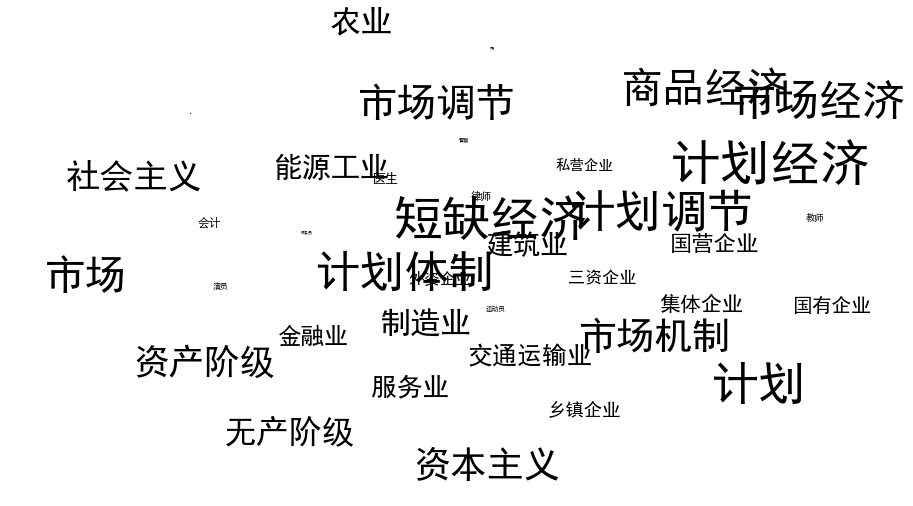

In [43]:
# Visualization
ProjPCATargetWords = PCA(n_components = 20).fit(ProjWordsSubMatrix)
ProjReducedPCA = ProjPCATargetWords.transform(ProjWordsSubMatrix)
ProjTSNETargetWords = TSNE(n_components = 2).fit_transform(ProjReducedPCA)

mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(ProjTSNETargetWords[:, 0], ProjTSNETargetWords[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(ProjTargetWords):
    ax.annotate(word, (ProjTSNETargetWords[:, 0][i], ProjTSNETargetWords[:, 1][i]), 
                size=50 * (len(ProjTargetWords) - i) / len(ProjTargetWords))
plt.xticks(())
plt.yticks(())
plt.savefig('../pictures/projection/words_vis.png')
plt.show()

In [44]:
# necessary functions
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = (np.array([normalize(model[x]) for x in positives]).sum(axis=0) - 
            np.array([normalize(model[y]) for y in negatives]).sum(axis=0))
    return diff

In [45]:
# Create dimensions
plan_mkt = dimension(model_sub,
                     ['计划经济', '短缺经济', '计划', '计划调节', '计划体制'],
                     ['市场经济', '商品经济', '市场', '市场调节', '市场机制'])

soci_capi = dimension(model_sub, ['社会主义', '无产阶级'], ['资本主义', '资产阶级'])

In [46]:
# Create domains
Industries = ['农业', '制造业', '能源工业', '建筑业',
              '交通运输业', '服务业', '金融业']

Firms = ['国营企业', '集体企业', '国有企业', '乡镇企业', 
         '三资企业', '外资企业', '私营企业']

Occupations = ['医生', '会计', '律师', '教师', '演员', 
               '运动员', '警察', '服务员', '农民', '工人']

In [52]:
# Create a dictionary for translation
tran_dict = {'农业': 'agriculture', '制造业': 'manufactory', '能源工业': 'energy', '建筑业': 'construction', 
             '交通运输业': 'transportation', '服务业': 'service', '金融业': 'finance', 
             '国营企业': 'state-run', '集体企业': 'collectively-run', '国有企业': 'state-owned', 
             '乡镇企业': 'township', '三资企业': 'sino-foreign', '外资企业': 'foreign=funded', '私营企业': 'private', 
             '医生': 'doctor', '会计': 'accountant', '律师': 'lawyer', '教师': 'teacher', '演员': 'actor/actress', 
             '运动员': 'athlete', '警察': 'policeman/policewoman', '服务员': 'waitor/waitress', 
             '农民': 'farmer', '工人': 'worker'}

In [53]:
def makeDF(model, word_list):
    p_m = []
    s_c = []
    for word in word_list:
        p_m.append(cosine_similarity(model[word].reshape(1,-1), plan_mkt.reshape(1,-1))[0][0])
        s_c.append(cosine_similarity(model[word].reshape(1, -1), soci_capi.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Institution': p_m, 'Ideology': s_c}, index = word_list)
    return df

In [54]:
# Get the projections
Inddf = makeDF(model_sub, Industries)
Firmdf = makeDF(model_sub, Firms)
Occdf = makeDF(model_sub, Occupations)

In [55]:
# Functions for plotting
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax, df, dim, tran_dict):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 15, x=0.11, y=1.1)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(tran_dict[word], (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

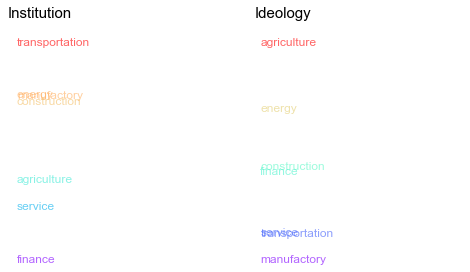

In [57]:
# Industries
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, Inddf, 'Institution', tran_dict)
ax2 = fig.add_subplot(122)
PlotDimension(ax2, Inddf, 'Ideology', tran_dict)
plt.savefig('../pictures/projection/Ind_full_corpus.png')
plt.show()

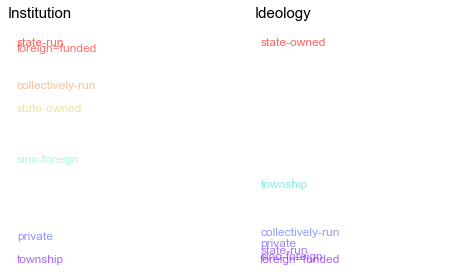

In [60]:
# Firms
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, Firmdf, 'Institution', tran_dict)
ax2 = fig.add_subplot(122)
PlotDimension(ax2, Firmdf, 'Ideology', tran_dict)
plt.savefig('../pictures/projection/Firm_full_corpus.png')
plt.show()

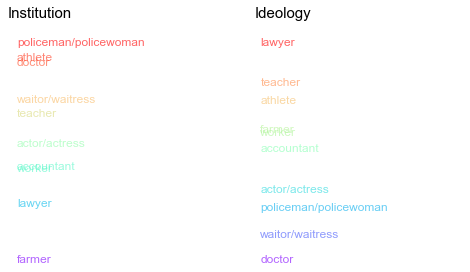

In [62]:
# Occupations
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, Occdf, 'Institution', tran_dict)
ax2 = fig.add_subplot(122)
PlotDimension(ax2, Occdf, 'Ideology', tran_dict)
plt.savefig('../pictures/projection/Occ_full_corpus.png')
plt.show()

### Projection with economics and politics subsample: 5-year period

In [63]:
# a first time indicator 
# please enter "No" because the word2vec models in different periods have been uploaded to git repo
first_time = input("Is this the first time to train the word2vec models in different periods? ")

Is this the first time to train the word2vec models in different periods? No


In [64]:
%%time
# train word2vec models in different time periods
if first_time == 'Yes':
#     for start_year in range(1965, 2003, 5):
#         corpus = []
#         if start_year ==2000:
#             for step in range(3):
#                 with open(corpus_name + "{}.txt".format(start_year + step), encoding='utf-8') as f:
#                     for line in f:
#                         tokens = line.split(' ')
#                         tokens.remove('\n')
#                         corpus.append(tokens)
#         else:
#             for step in range(5):
#                 with open(corpus_name + "{}.txt".format(start_year + step), encoding='utf-8') as f:
#                     for line in f:
#                         tokens = line.split(' ')
#                         tokens.remove('\n')
#                         corpus.append(tokens)
#         model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
#         model.save('../models/Word2Vec&Doc2Vec/rmrb_{}-{}_W2V'.format(start_year, start_year + 4))
        print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_6569 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1965-1969_W2V')
        model_7074 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1970-1974_W2V')
        model_7579 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1975-1979_W2V')
        model_8084 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1980-1984_W2V')
        model_8589 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1985-1989_W2V')
        model_9094 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1990-1994_W2V')
        model_9599 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1995-1999_W2V')
        model_0002 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_2000-2004_W2V')
        embedding_raw_dict_5year = {'65-69': model_6569,
                                    '70-74': model_7074,
                                    '75-79': model_7579,
                                    '80-84': model_8084,
                                    '85-89': model_8589,
                                    '90-94': model_9094,
                                    '95-99': model_9599,
                                    '00-02': model_0002}
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 2.95 s


In [65]:
def dimension_periods(embedding_dict, positives, negatives):
    dimension_dict = {}
    
    for key, value in embedding_dict.items():
        positives_filter = []
        negatives_filter = []
        for x in positives:
            try:
                value[x]
            except KeyError:
                continue
            else:
                positives_filter.append(x)
        for y in negatives:
            try:
                value[y]
            except KeyError:
                continue
            else:
                negatives_filter.append(y)
        diff = (np.array([normalize(value[x]) for x in positives_filter]).sum(axis=0) - 
                np.array([normalize(value[y]) for y in negatives_filter]).sum(axis=0))
        dimension_dict[key] = diff
    return dimension_dict

In [66]:
def makeDF_periods(embedding_dict, dimension_dict, word_list):
    df_dict = {}
    for key, value in embedding_dict.items():
        similarity_list = []
        for word in word_list:
            try:
                cos_sim = cosine_similarity(value[word].reshape(1,-1), dimension_dict[key].reshape(1,-1))[0][0]
            except KeyError:
                similarity_list.append('NA')
            else:
                similarity_list.append(cos_sim)
        df_dict[key] = similarity_list
    df = pd.DataFrame(df_dict, index = word_list)
    return df

In [67]:
plan_mkt_dict_5year = dimension_periods(embedding_raw_dict_5year,
                                        ['计划经济', '短缺经济', '计划', '计划调节', '计划体制'],
                                        ['市场经济', '商品经济', '市场', '市场调节', '市场机制'])

soci_capi_dict_5year = dimension_periods(embedding_raw_dict_5year, 
                                         ['社会主义', '无产阶级'], 
                                         ['资本主义', '资产阶级'])

In [68]:
Ind_pm_df_5year = makeDF_periods(embedding_raw_dict_5year, plan_mkt_dict_5year, Industries)

Ind_pm_df_5year

,65-69,70-74,75-79,80-84,85-89,90-94,95-99,00-02
农业,0.367818,0.600195,-0.231245,-0.238134,-0.239529,0.0312008,-0.000498418,-0.205946
制造业,0.707753,NA,NA,NA,NA,0.382001,-0.028398,-0.222597
能源工业,NA,NA,NA,-0.00113635,-0.112064,NA,NA,NA
建筑业,NA,NA,NA,-0.00562952,-0.336259,0.369967,-0.235459,NA
交通运输业,0.693136,NA,-0.321789,-0.15552,-0.38646,0.543463,NA,NA
服务业,NA,0.358263,-0.60318,-0.2265,-0.338225,0.0680372,-0.248362,-0.402276
金融业,NA,NA,NA,NA,NA,0.330989,-0.361982,-0.224547


In [69]:
Ind_sc_df_5year = makeDF_periods(embedding_raw_dict_5year, soci_capi_dict_5year, Industries)

Ind_sc_df_5year

,65-69,70-74,75-79,80-84,85-89,90-94,95-99,00-02
农业,0.0341856,0.203623,0.0556983,0.0432899,0.138858,0.293077,0.136989,-0.0818403
制造业,-0.114654,NA,NA,NA,NA,-0.273785,-0.522376,-0.401714
能源工业,NA,NA,NA,-0.12456,0.00276591,NA,NA,NA
建筑业,NA,NA,NA,-0.0854286,0.035069,-0.108864,-0.547902,NA
交通运输业,-0.0605521,NA,0.00441827,-0.219557,0.00524237,-0.0455572,NA,NA
服务业,NA,0.0425815,-0.0574917,-0.234898,-0.13715,-0.116778,-0.500044,-0.449267
金融业,NA,NA,NA,NA,NA,-0.19784,-0.417689,-0.334678


In [72]:
Firm_pm_df_5year = makeDF_periods(embedding_raw_dict_5year, plan_mkt_dict_5year, Firms)

Firm_pm_df_5year

,65-69,70-74,75-79,80-84,85-89,90-94,95-99,00-02
国营企业,0.757731,0.427129,-0.806835,-0.00489461,-0.021367,0.231602,NA,NA
集体企业,NA,NA,-0.813241,-0.0289118,-0.120201,0.392273,-0.249278,-0.39377
国有企业,NA,NA,NA,NA,-0.176128,0.162713,-0.169497,-0.250925
乡镇企业,NA,NA,NA,-0.060506,-0.391679,-0.075713,-0.228498,-0.267921
三资企业,NA,NA,NA,NA,-0.081425,0.336916,-0.0812029,NA
外资企业,NA,NA,NA,NA,-0.079411,0.458765,-0.111098,-0.184326
私营企业,0.776513,NA,NA,NA,-0.155756,0.218129,-0.326088,-0.274545


In [73]:
Firm_sc_df_5year = makeDF_periods(embedding_raw_dict_5year, soci_capi_dict_5year, Firms)

Firm_sc_df_5year

,65-69,70-74,75-79,80-84,85-89,90-94,95-99,00-02
国营企业,-0.264266,-0.190675,-0.179971,-0.231192,-0.173277,-0.296564,NA,NA
集体企业,NA,NA,-0.164304,-0.27836,-0.212918,-0.124394,-0.3215,-0.211801
国有企业,NA,NA,NA,NA,-0.074597,-0.170341,0.0699302,0.181148
乡镇企业,NA,NA,NA,-0.109397,-0.057636,0.096237,-0.135636,-0.269811
三资企业,NA,NA,NA,NA,-0.217809,-0.427063,-0.396486,NA
外资企业,NA,NA,NA,NA,0.011961,-0.404863,-0.387834,-0.422307
私营企业,-0.144757,NA,NA,NA,-0.232947,-0.390943,-0.330946,-0.215228


In [74]:
Occ_pm_df_5year = makeDF_periods(embedding_raw_dict_5year, plan_mkt_dict_5year, Occupations)

Occ_pm_df_5year

,65-69,70-74,75-79,80-84,85-89,90-94,95-99,00-02
医生,0.631269,0.352842,-0.756166,0.173971,NA,0.556459,-0.15006,-0.197502
会计,0.584269,0.313884,-0.772279,0.501084,0.135223,0.321003,-0.312308,-0.463621
律师,NA,NA,NA,0.522406,-0.183155,0.483303,-0.274415,-0.143691
教师,0.594989,0.161639,-0.412926,0.114493,-0.0116629,0.243528,-0.264994,-0.260593
演员,0.59155,0.214064,-0.791373,NA,-0.0235805,0.391584,-0.120048,NA
运动员,NA,0.122845,NA,0.101086,-0.189105,0.522468,-0.219446,NA
警察,0.657763,0.2138,NA,0.214944,0.236014,NA,-0.140596,-0.0283826
服务员,NA,0.207087,NA,0.0420702,NA,0.519482,NA,NA
农民,-0.176852,-0.0743927,-0.361441,-0.395936,-0.508976,-0.123439,-0.221023,-0.163284
工人,0.0989234,0.203013,-0.299616,-0.124341,-0.222208,0.0672924,-0.17731,-0.166178


In [75]:
Occ_sc_df_5year = makeDF_periods(embedding_raw_dict_5year, soci_capi_dict_5year, Occupations)

Occ_sc_df_5year

,65-69,70-74,75-79,80-84,85-89,90-94,95-99,00-02
医生,-0.154362,-0.168602,-0.140002,-0.165516,NA,-0.146661,-0.230514,-0.427993
会计,-0.147382,-0.152972,-0.175923,0.074543,-0.0339734,-0.244685,-0.406574,-0.116808
律师,NA,NA,NA,0.0832552,0.402849,-0.179406,-0.134793,-0.20735
教师,-0.14067,0.0252065,-0.063652,-0.156898,0.165693,0.0450455,-0.320867,-0.296279
演员,-0.0594385,-0.0726948,-0.0758812,NA,-0.0732843,-0.012696,-0.308335,NA
运动员,NA,0.00597164,NA,-0.136997,-0.0494303,-0.07877,-0.13394,NA
警察,-0.26799,-0.156864,NA,-0.0502253,0.0564117,NA,-0.293207,-0.442989
服务员,NA,-0.0758403,NA,-0.209036,NA,-0.190268,NA,NA
农民,-0.0530665,-0.111411,-0.163194,-0.0831318,-0.0986012,0.198452,-0.105914,-0.201218
工人,-0.155244,0.0108694,-0.128837,-0.0919043,0.107108,0.0212355,-0.223503,-0.277556


There are too many NAs given the models are much smaller. Try to cluster different periods a little bit.

### Projection with economics and politics subsample: pre- and post- 1992

In [76]:
# a first time indicator 
# please enter "No" because the word2vec models in different periods have been uploaded to git repo
first_time = input("Is this the first time to train the word2vec models pre- and post- 1992? ")

Is this the first time to train the word2vec models pre- and post- 1992? No


In [77]:
%%time
# train word2vec models in different time periods
if first_time == 'Yes':
#     corpus = []
#     for year in range(1978, 1992):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus.append(tokens)
#     model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
#     model.save('../models/Word2Vec&Doc2Vec/rmrb_pre1992_W2V')
#     corpus = []
#     for year in range(1992, 2003):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus.append(tokens)
#     model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
#     model.save('../models/Word2Vec&Doc2Vec/rmrb_post1992_W2V')
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_pre1992 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_pre1992_W2V')
        model_post1992 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_post1992_W2V')
        embedding_dict_1992 = {'pre-1992': model_pre1992,
                               'post-1992': model_post1992}
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 1.22 s


In [78]:
plan_mkt_dict_1992 = dimension_periods(embedding_dict_1992,
                                       ['计划经济', '短缺经济', '计划', '计划调节', '计划体制'],
                                       ['市场经济', '商品经济', '市场', '市场调节', '市场机制'])

soci_capi_dict_1992 = dimension_periods(embedding_dict_1992, 
                                        ['社会主义', '无产阶级'], 
                                        ['资本主义', '资产阶级'])

In [79]:
Ind_pm_df_1992 = makeDF_periods(embedding_dict_1992, plan_mkt_dict_1992, Industries)

Ind_pm_df_1992

,pre-1992,post-1992
农业,0.070491,-0.073312
制造业,-0.056274,0.099890
能源工业,0.154211,0.183211
建筑业,0.003692,0.242101
交通运输业,0.141078,0.369364
服务业,-0.115159,-0.186528
金融业,0.138240,-0.123163


In [80]:
Ind_sc_df_1992 = makeDF_periods(embedding_dict_1992, soci_capi_dict_1992, Industries)

Ind_sc_df_1992

,pre-1992,post-1992
农业,0.111583,0.147531
制造业,-0.238360,-0.310143
能源工业,-0.120049,-0.231870
建筑业,-0.116948,-0.237538
交通运输业,-0.150730,-0.167941
服务业,-0.202858,-0.234209
金融业,-0.113647,-0.194123


In [81]:
Firm_pm_df_1992 = makeDF_periods(embedding_dict_1992, plan_mkt_dict_1992, Firms)

Firm_pm_df_1992

,pre-1992,post-1992
国营企业,0.077669,0.122901
集体企业,-0.076495,0.063400
国有企业,0.130959,-0.071676
乡镇企业,-0.174485,-0.207619
三资企业,-0.026114,0.019114
外资企业,0.082360,0.102892
私营企业,-0.080219,-0.142610


In [82]:
Firm_sc_df_1992 = makeDF_periods(embedding_dict_1992, soci_capi_dict_1992, Firms)

Firm_sc_df_1992

,pre-1992,post-1992
国营企业,-0.233412,-0.172974
集体企业,-0.278967,-0.236519
国有企业,-0.131456,0.142587
乡镇企业,-0.201464,-0.028380
三资企业,-0.367068,-0.376856
外资企业,-0.084938,-0.398233
私营企业,-0.260146,-0.163098


In [83]:
Occ_pm_df_1992 = makeDF_periods(embedding_dict_1992, plan_mkt_dict_1992, Occupations)

Occ_pm_df_1992

,pre-1992,post-1992
医生,0.095958,0.303902
会计,0.173996,-0.074268
律师,0.064624,-0.065295
教师,0.116945,0.010796
演员,-0.015163,0.249623
运动员,0.087126,0.356717
警察,0.087025,0.199377
服务员,-0.075456,0.392795
农民,-0.235192,-0.169140
工人,-0.133268,-0.034298


In [84]:
Occ_sc_df_1992 = makeDF_periods(embedding_dict_1992, soci_capi_dict_1992, Occupations)

Occ_sc_df_1992

,pre-1992,post-1992
医生,-0.134278,-0.233705
会计,0.043393,-0.120148
律师,0.097483,0.026813
教师,0.052261,0.119337
演员,-0.184250,-0.129299
运动员,-0.076567,-0.056418
警察,-0.062275,-0.263752
服务员,-0.139121,-0.136273
农民,-0.018122,0.060052
工人,-0.059448,-0.135689


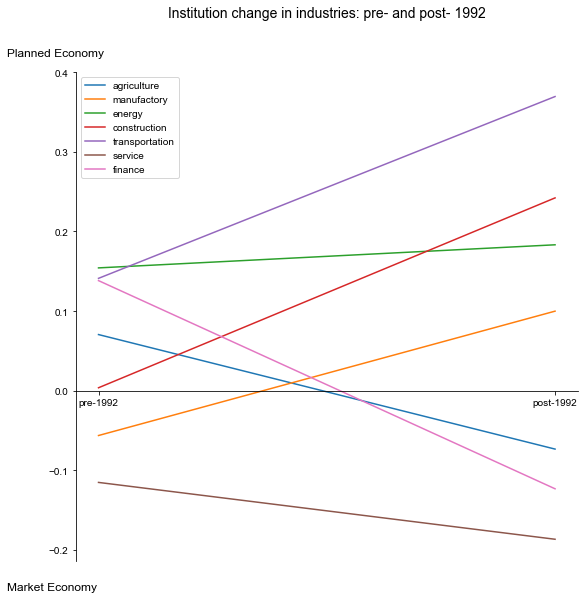

In [86]:
# Visualization: industries over institution
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (9, 9))
ax = plt.gca()
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['农业', :], label='agriculture')
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['制造业', :], label='manufactory')
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['能源工业', :], label='energy')
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['建筑业', :], label='construction')
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['交通运输业', :], label='transportation')
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['服务业', :], label='service')
ax.plot(['pre-1992', 'post-1992'], Ind_pm_df_1992.loc['金融业', :], label='finance')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(-0.2, 0.4, 0.1))
ax.set_title('Institution change in industries: pre- and post- 1992', fontsize=14, y=1.1)
ax.text(-0.2, 0.42, 'Planned Economy', color='black', size=12)
ax.text(-0.2, -0.25, 'Market Economy', color='black', size=12)
ax.legend()
plt.savefig('../pictures/projection/Ind_Ins_sep_corpus.png')
plt.show()

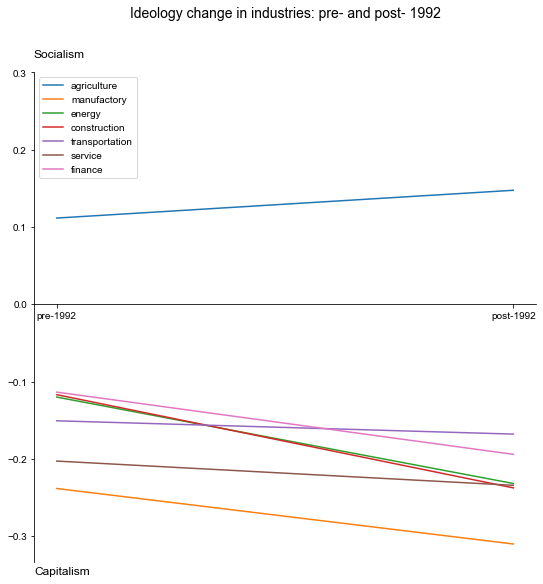

In [87]:
# Visualization: industries over ideology
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (9, 9))
ax = plt.gca()
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['农业', :], label='agriculture')
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['制造业', :], label='manufactory')
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['能源工业', :], label='energy')
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['建筑业', :], label='construction')
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['交通运输业', :], label='transportation')
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['服务业', :], label='service')
ax.plot(['pre-1992', 'post-1992'], Ind_sc_df_1992.loc['金融业', :], label='finance')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(-0.3, 0.4, 0.1))
ax.set_title('Ideology change in industries: pre- and post- 1992', fontsize=14, y=1.1)
ax.text(-0.05, 0.32, 'Socialism', color='black', size=12)
ax.text(-0.05, -0.35, 'Capitalism', color='black', size=12)
ax.legend(loc='upper left') 
plt.savefig('../pictures/projection/Ind_Ideo_sep_corpus.png')
plt.show()

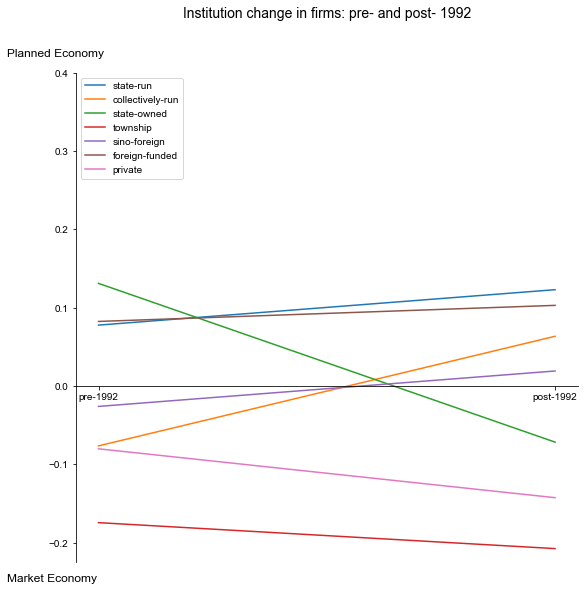

In [88]:
# Visualization: firms over institution
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (9, 9))
ax = plt.gca()
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['国营企业', :], label='state-run')
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['集体企业', :], label='collectively-run')
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['国有企业', :], label='state-owned')
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['乡镇企业', :], label='township')
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['三资企业', :], label='sino-foreign')
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['外资企业', :], label='foreign-funded')
ax.plot(['pre-1992', 'post-1992'], Firm_pm_df_1992.loc['私营企业', :], label='private')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(-0.2, 0.4, 0.1))
ax.set_title('Institution change in firms: pre- and post- 1992', fontsize=14, y=1.1)
ax.text(-0.2, 0.42, 'Planned Economy', color='black', size=12)
ax.text(-0.2, -0.25, 'Market Economy', color='black', size=12)
ax.legend(loc='upper left') 
plt.savefig('../pictures/projection/Firm_Ins_sep_corpus.png')
plt.show()

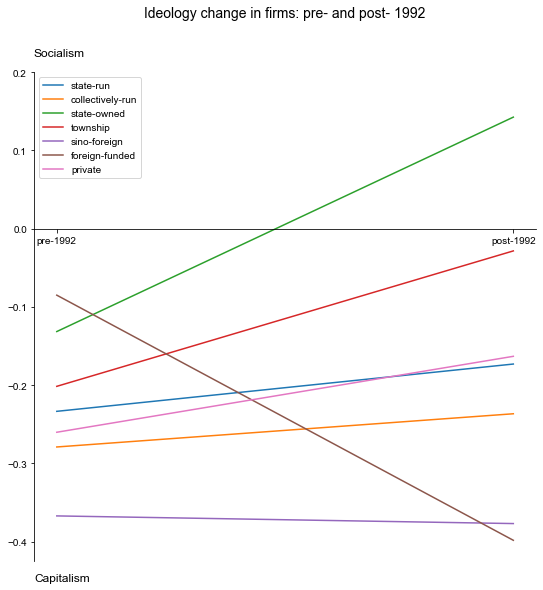

In [89]:
# Visualization: firms over ideology
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (9, 9))
ax = plt.gca()
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['国营企业', :], label='state-run')
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['集体企业', :], label='collectively-run')
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['国有企业', :], label='state-owned')
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['乡镇企业', :], label='township')
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['三资企业', :], label='sino-foreign')
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['外资企业', :], label='foreign-funded')
ax.plot(['pre-1992', 'post-1992'], Firm_sc_df_1992.loc['私营企业', :], label='private')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(-0.4, 0.2, 0.1))
ax.set_title('Ideology change in firms: pre- and post- 1992', fontsize=14, y=1.1)
ax.text(-0.05, 0.22, 'Socialism', color='black', size=12)
ax.text(-0.05, -0.45, 'Capitalism', color='black', size=12)
ax.legend(loc='upper left')
plt.savefig('../pictures/projection/Firm_Ideo_sep_corpus.png')
plt.show()

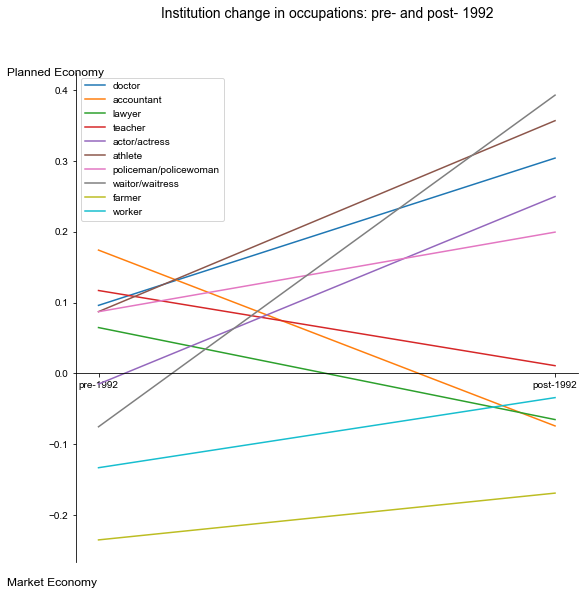

In [91]:
# Visualization: occupations over institution
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (9, 9))
ax = plt.gca()
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['医生', :], label='doctor')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['会计', :], label='accountant')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['律师', :], label='lawyer')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['教师', :], label='teacher')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['演员', :], label='actor/actress')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['运动员', :], label='athlete')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['警察', :], label='policeman/policewoman')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['服务员', :], label='waitor/waitress')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['农民', :], label='farmer')
ax.plot(['pre-1992', 'post-1992'], Occ_pm_df_1992.loc['工人', :], label='worker')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(-0.2, 0.4, 0.1))
ax.set_title('Institution change in occupations: pre- and post- 1992', fontsize=14, y=1.1)
ax.text(-0.2, 0.42, 'Planned Economy', color='black', size=12)
ax.text(-0.2, -0.3, 'Market Economy', color='black', size=12)
ax.legend(loc='upper left')
plt.savefig('../pictures/projection/Occ_Ins_sep_corpus.png')
plt.show()

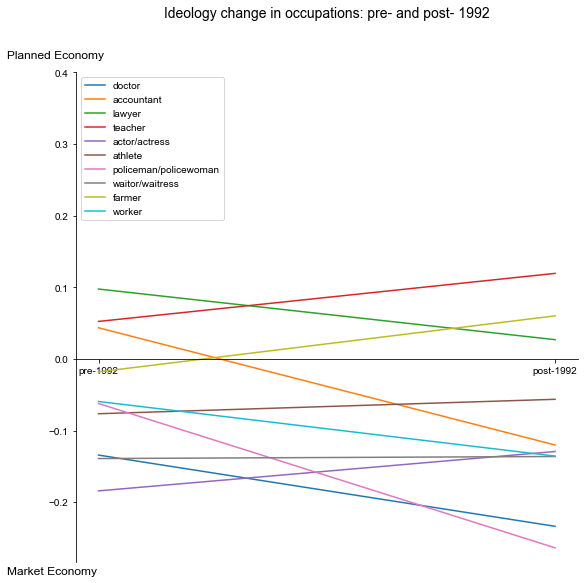

In [93]:
# Visualization: occupations over institution
mpl.rcParams['font.sans-serif'] = ['Arial']

fig = plt.figure(figsize = (9, 9))
ax = plt.gca()
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['医生', :], label='doctor')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['会计', :], label='accountant')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['律师', :], label='lawyer')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['教师', :], label='teacher')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['演员', :], label='actor/actress')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['运动员', :], label='athlete')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['警察', :], label='policeman/policewoman')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['服务员', :], label='waitor/waitress')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['农民', :], label='farmer')
ax.plot(['pre-1992', 'post-1992'], Occ_sc_df_1992.loc['工人', :], label='worker')
ax.spines["bottom"].set_position("zero")
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(-0.2, 0.4, 0.1))
ax.set_title('Ideology change in occupations: pre- and post- 1992', fontsize=14, y=1.1)
ax.text(-0.2, 0.42, 'Planned Economy', color='black', size=12)
ax.text(-0.2, -0.3, 'Market Economy', color='black', size=12)
ax.legend(loc='upper left') 
plt.savefig('../pictures/projection/Occ_Ideo_sep_corpus.png')
plt.show()

### Dynamic word2vec with economics and politics subsample (5-year period)

In [94]:
# a first time indicator 
# please enter "No" because the word2vec models in different periods have been uploaded to git repo
first_time = input("Is this the first time to train the word2vec models in different periods? ")

Is this the first time to train the word2vec models in different periods? No


In [95]:
%%time
# train word2vec models in different time periods
if first_time == 'Yes':
#     for start_year in range(1965, 2003, 5):
#         corpus = []
#         if start_year ==2000:
#             for step in range(3):
#                 with open(corpus_name + "{}.txt".format(start_year + step), encoding='utf-8') as f:
#                     for line in f:
#                         tokens = line.split(' ')
#                         tokens.remove('\n')
#                         corpus.append(tokens)
#         else:
#             for step in range(5):
#                 with open(corpus_name + "{}.txt".format(start_year + step), encoding='utf-8') as f:
#                     for line in f:
#                         tokens = line.split(' ')
#                         tokens.remove('\n')
#                         corpus.append(tokens)
#         model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
#         model.save('../models/Word2Vec&Doc2Vec/rmrb_{}-{}_W2V'.format(start_year, start_year + 4))
        print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_6569 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1965-1969_W2V')
        model_7074 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1970-1974_W2V')
        model_7579 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1975-1979_W2V')
        model_8084 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1980-1984_W2V')
        model_8589 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1985-1989_W2V')
        model_9094 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1990-1994_W2V')
        model_9599 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1995-1999_W2V')
        model_0002 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_2000-2004_W2V')
        embedding_raw_dict_5year = {'65-69': model_6569,
                                    '70-74': model_7074,
                                    '75-79': model_7579,
                                    '80-84': model_8084,
                                    '85-89': model_8589,
                                    '90-94': model_9094,
                                    '95-99': model_9599,
                                    '00-02': model_0002}
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 2.24 s


In [96]:
# functions from week 6 notebook
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words 
    (see `intersection_align_gensim` documentation).
    """
    
    # patch by Richard So [https://twitter.com/richardjeanso) (thanks!) to update this code for new version of gensim
    base_embed.init_sims()
    other_embed.init_sims()
    
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [97]:
# define a function to compare different models
def compareModels(embeddings_raw):
    """If you are using time as your category sorting is important"""
    cats = embeddings_raw.keys()
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], 
                                                                              embeddings_raw[catInner]))
    return embeddings_aligned

In [98]:
# define a function to calculate divergence
def getDivergenceDF(word, embeddingsDict):
    cats = embeddingsDict.keys()
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis=0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index=cats)

In [99]:
# define functions to find the most divergent words
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [100]:
embedding_compared_dict_5year = compareModels(embedding_raw_dict_5year)

经济


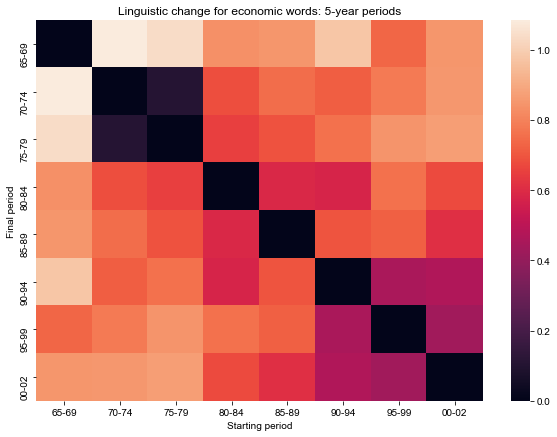

In [101]:
TargetWord = '经济'

mpl.rcParams['font.sans-serif'] = ['Arial']

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_5year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting period")
ax.set_ylabel("Final period")
ax.set_title("Linguistic change for economic words: 5-year periods")
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/economic_5year.png')
plt.show()

政治


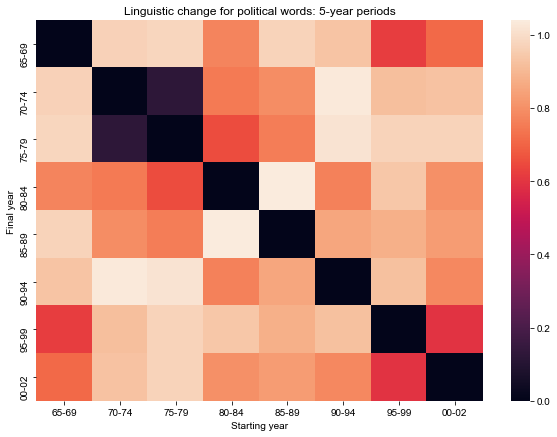

In [102]:
TargetWord = '政治'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_5year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Linguistic change for political words: 5-year periods".format(TargetWord))
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/political_5year.png')
plt.show()

社会主义


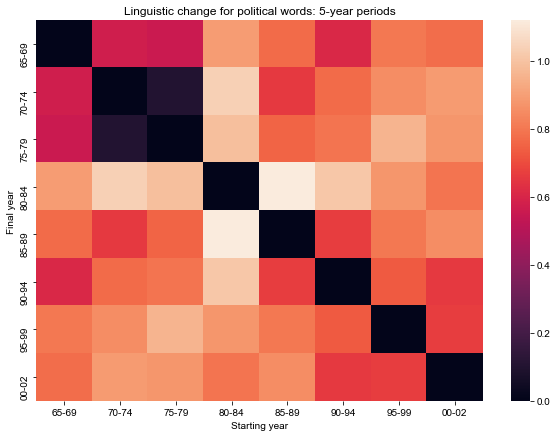

In [103]:
TargetWord = '社会主义'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_5year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Linguistic change for political words: 5-year periods".format(TargetWord))
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/socialism_5year.png')
plt.show()

资本主义


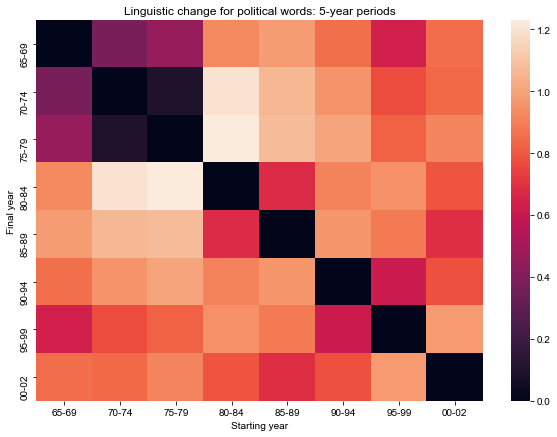

In [104]:
TargetWord = '资本主义'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_5year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Linguistic change for political words: 5-year periods".format(TargetWord))
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/capitalism_5year.png')
plt.show()

### Dynamic word2vec with economics and politics subsample (1-year period)

In [105]:
# a first time indicator 
# please enter "No" because the word2vec models in different periods have been uploaded to git repo
first_time = input("Is this the first time to train the word2vec models in different years? ")

Is this the first time to train the word2vec models in different years? No


In [106]:
%%time
# train word2vec models in different years
if first_time == "Yes":
#     for year in range(1965, 2003):
#         corpus = []
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus.append(tokens)
#         model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
#         model.save('../models/Word2Vec&Doc2Vec/rmrb_{}_W2V'.format(year))
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        embedding_raw_dict_1year = {}
        for year in range(1965, 2003):
            embedding_raw_dict_1year[year] = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_{}_W2V'.format(year))
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 4.52 s


In [107]:
embedding_compared_dict_1year = compareModels(embedding_raw_dict_1year)

经济


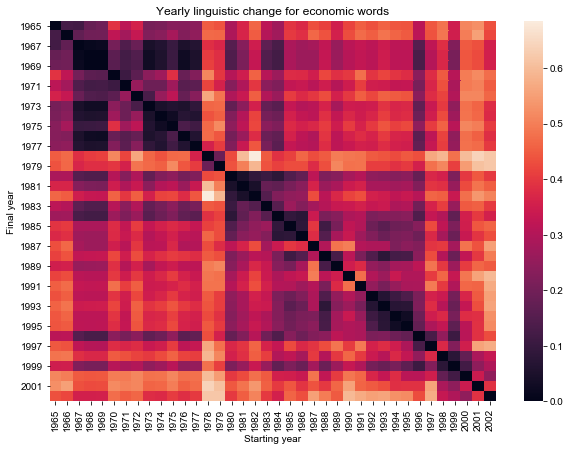

In [108]:
TargetWord = '经济'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_1year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for economic words")
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/economic_1year.png')
plt.show()

政治


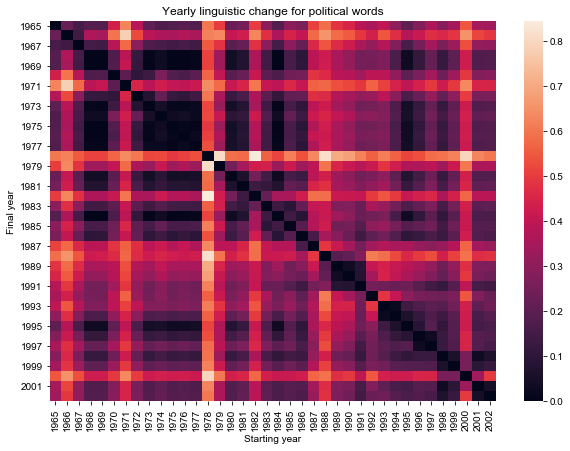

In [109]:
TargetWord = '政治'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_1year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for political words")
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/political_1year.png')
plt.show()

社会主义


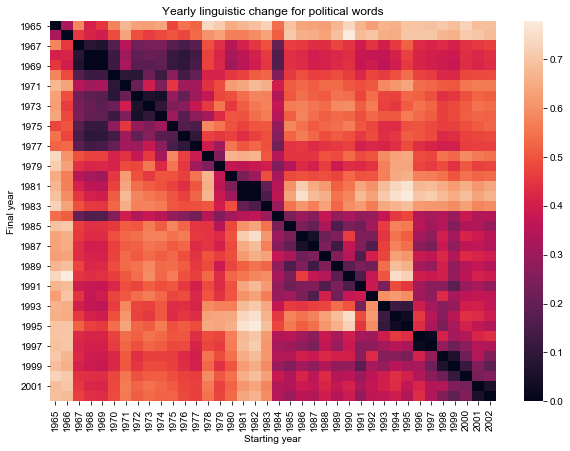

In [110]:
TargetWord = '社会主义'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_1year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for political words")
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/socialism_1year.png')
plt.show()

资本主义


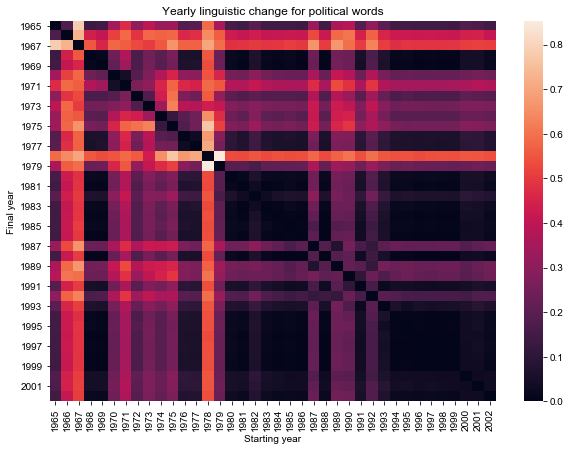

In [111]:
TargetWord = '资本主义'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_1year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for political words")
plt.savefig('../pictures/dynamic_word2vec/relative_aligned/capitalism_1year.png')
plt.show()